In [6]:
import pandas as pd
import numpy as np

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Core ML & preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, Binarizer,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Models
from sklearn.naive_bayes import  BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report





Basic info about the dataset

Encode categorical columns if any

Fill or drop missing values

In [9]:
# Load train & test sets
train_df = pd.read_csv("kdd_train.csv")
test_df  = pd.read_csv("kdd_test.csv")

train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


Identify categorical columns

In [10]:
# Separate
# features and target
X_train = train_df.drop('labels', axis=1)
y_train = train_df['labels']
X_test = test_df.drop('labels', axis=1)
y_test = test_df['labels']

In [11]:
# 1. Identify column types
target_col = "labels"
categorical_cols = X_train.select_dtypes(include=['object']).columns
numeric_cols = X_train.columns.difference(categorical_cols)

In [12]:
# 2. Preprocessor for BernoulliNB
preprocessor = ColumnTransformer([
    ('num_scale', StandardScaler(), numeric_cols),              # scale numeric
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')


Preprocessor

Build the pipeline

In [13]:

# 3. Full pipeline: scale → transform → binarize → BernoulliNB
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('binarize', Binarizer(threshold=0.0)),     # convert all values to 0/1
    ('classifier', BernoulliNB(alpha=0.5))       # smoothing improves performance
])

Train and predict

In [14]:

# Train and predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


 models used in the paper: bagging, xgb,  decision tree, logistic regression , two nbs

In [15]:
# Evaluate
# performance
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

Accuracy:  0.7897
Precision: 0.8286
Recall:    0.7897
F1 Score:  0.7854


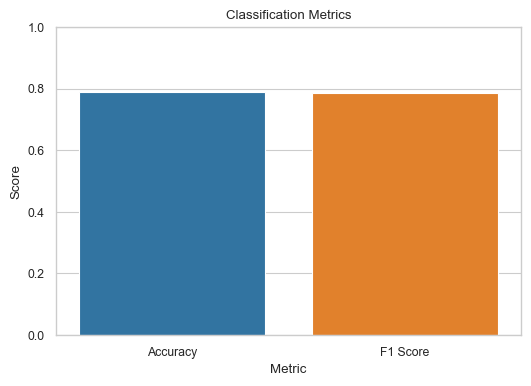

In [17]:
# Apply style
sns.set_style("whitegrid")
sns.set_context("paper")

# Compute metrics
accuracy = accuracy_score(test_df['labels'], y_pred)
f1 = f1_score(test_df['labels'], y_pred, average='weighted')   # weighted F1 for multiclass


# Prepare DataFrame for plotting
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'F1 Score'],
    'Value': [accuracy, f1]
})

# Plot bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x='Metric', y='Value', data=metrics_df)
plt.title("Classification Metrics")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.show()
